<a href="https://colab.research.google.com/github/Kevincancino26/mis-notebook-de-estudio-/blob/main/Clasificaci%C3%B3n_validaci%C3%B3n_de_modelos_y_m%C3%A9tricas_de_evaluaci%C3%B3n(practica_clasificador_de_diagnostico_de_pacientes_con_diabetes).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='skyblue'>**Clasificación: De pacientes con diabetes o no**</h1>

##<font color='skyblue'>Proyecto

Se trabaja en un consultorio y nos solicitan analisar un conjunto de pacientes diagnosticados con diabetes si estos si tienen o no, para concondar con los registros

In [1]:
import pandas as pd

In [2]:
diabetes_df=pd.read_csv('/content/diabetes.csv')
diabetes_df.head()

,glicemia,presion_sanguinea,grasa_subcutanea_triceps,insulina,imc,diabetes
0,66,23,94,28.1,0.167,0
1,40,35,168,43.1,2.288,1
2,50,32,88,31.0,0.248,1
3,70,45,543,30.5,0.158,1
4,60,23,846,30.1,0.398,1


In [3]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   glicemia                  394 non-null    int64  
 1   presion_sanguinea         394 non-null    int64  
 2   grasa_subcutanea_triceps  394 non-null    int64  
 3   insulina                  394 non-null    float64
 4   imc                       394 non-null    float64
 5   diabetes                  394 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 18.6 KB


##1 - Para la construcción de un modelo de machine learning se necesitan datos. Como tarea inicial, realiza la lectura de la base de datos de diabetes y divide los datos en variables explicativas y variable objetivo (x e y). La variable objetivo es la columna que quieres clasificar, que contiene la información de si el paciente tiene o no diabetes. Las variables explicativas son todas las columnas excepto la de diabetes. La separación de los datos se puede hacer con la selección de columnas con pandas.



In [4]:
x=diabetes_df.drop('diabetes',axis=1)
y=diabetes_df['diabetes']

##2 - Una etapa muy importante en proyectos de clasificación es la validación de los modelos, para identificar si hay una generalización del modelo para datos nuevos. Realiza la división de los datos entre entrenamiento, validación y prueba. Utiliza el 5% de los datos para prueba y con el resto, deja el 25% para validación. En el momento de la separación, usa el parámetro stratify a partir de la variable objetivo para mantener la proporción de los datos.

In [5]:
from sklearn.model_selection import train_test_split

In [8]:
x,x_test,y,y_test=train_test_split(x,y,test_size=0.05,stratify=y,random_state=5)
x_train,x_val,y_train,y_val=train_test_split(x,y,stratify=y,random_state=5)

##3 - La etapa de modelado de datos consiste en utilizar un algoritmo capaz de identificar patrones en los datos y clasificar los valores. A partir del modelo es posible extraer una tasa de acierto para entender su desempeño. Crea 2 modelos utilizando los algoritmos DecisionTreeClassifier y RandomForestClassifier y evalúa la precisión de entrenamiento y prueba, eligiendo el valor 3 para el parámetro max_depth del algoritmo DecisionTreeClassifier y el valor 2 para el max_depth del algoritmo RandomForestClassifier, para que los modelos no se especialicen demasiado en el patrón de los datos de entrenamiento.

####Arbol de decicion

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
modelo_arbol=DecisionTreeClassifier(max_depth=3)
modelo_arbol.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [11]:
print('Tasa de acierto en entrenamiento:',modelo_arbol.score(x_train,y_train))
print('Tasa de acierto en prueba:',modelo_arbol.score(x_val,y_val))

Tasa de acierto en entrenamiento: 0.75
Tasa de acierto en prueba: 0.6588235294117647


al observar los parametros notamos que en entrenamiento salio con 75% nos dice que nuestro modelo aprendio mas los datos, pero al obtener la validacion nos da un 65% cual nos indica que se aprendio los datos de entrenamiento y al momento de ingresar datos no visto el modelo pierde fuersa en la prediccion de lso pacientes con diabetes

####Randomforest

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
modelo_random=RandomForestClassifier(max_depth=2)
modelo_random.fit(x_train,y_train)

RandomForestClassifier(max_depth=2)

In [14]:
print(f'Tasa de acierto en entrenamiento: {modelo_random.score(x_train,y_train)}')
print(f'Tasa de acierto en prueba: {modelo_random.score(x_val,y_val)}')

Tasa de acierto en entrenamiento: 0.746031746031746
Tasa de acierto en prueba: 0.7058823529411765


al observar los parametros notamos que este tiene mayor fuerza a la hora de predecir la validadcion de los pacientes con diabetes o no, dado que en el entrenamiento salio con 74% con los datos de entrenamiento, al proporcionarle datos nuevos nos valida con un 70% de exactitud nuestro modelo mas alto que el de arbol pero sigue bajo de los parametros de entrenamiento, indicando un aspecto similar al del arbol

##4 - La tasa de acierto generalmente no proporciona información suficiente para entender el comportamiento del modelo. La matriz de confusión es una herramienta más completa, capaz de proporcionar los aciertos y errores del modelo para cada clase. Construye una matriz de confusión para cada uno de los modelos para evaluar el desempeño de la predicción. Para construir la matriz, usa el método predict para generar las predicciones de los valores y comparar con los valores reales de la base de datos.

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay

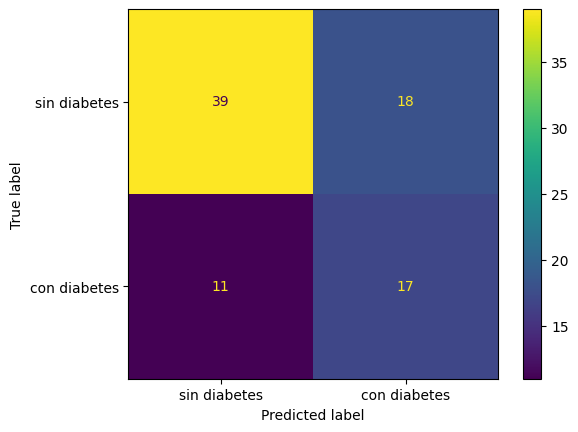

In [23]:
arbol_prediccion=modelo_arbol.predict(x_val)
matriz_arbol=ConfusionMatrixDisplay.from_predictions(y_val,arbol_prediccion,display_labels=['sin diabetes','con diabetes'])

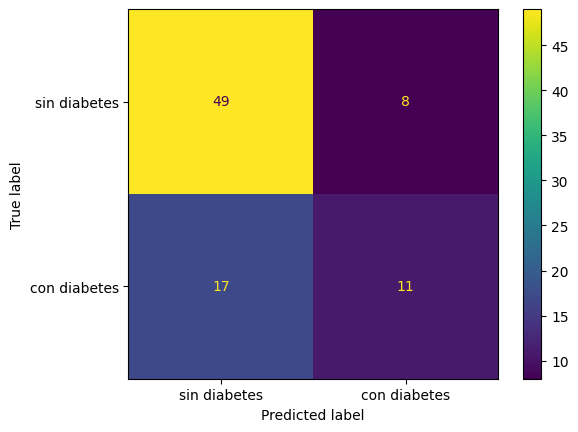

In [24]:
randomforest_prediccion=modelo_random.predict(x_val)
matriz_random=ConfusionMatrixDisplay.from_predictions(y_val,randomforest_prediccion,display_labels=['sin diabetes','con diabetes'])